### Farid Abdalla & Noah Graells

# Exerice 2 : System evaluation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

syst_a = np.genfromtxt('ex2-system-a.csv', delimiter=';')
syst_b = np.genfromtxt('ex2-system-b.csv', delimiter=';')

In [2]:
# remove last empty col
syst_a = np.array([x[:-1] for x in syst_a])
syst_b = np.array([x[:-1] for x in syst_b])

# get the ground truth for each prediction
syst_a_true = np.array([int(x[-1]) for x in syst_a])
syst_b_true = np.array([int(x[-1]) for x in syst_b])

# remove the ground truth col from prediction arrays
syst_a = np.array([x[:-1] for x in syst_a])
syst_b = np.array([x[:-1] for x in syst_b])

### a) Classification decisions

In [3]:
def bayes_classification_decisions(preds):
    res = []
    for entry in preds:
        max_ind = 0
        for i in range(len(entry)):
            if entry[i] >= entry[max_ind]:
                max_ind = i
        res.append(max_ind)
     
    return res

In [4]:
syst_a_pred = np.array(bayes_classification_decisions(syst_a))
syst_b_pred = np.array(bayes_classification_decisions(syst_b))

### b) Error rate

In [5]:
def error_rate(gt, pred):
    return (gt != pred).sum()/len(gt)

In [6]:
print("System a error rate :", error_rate(syst_a_true, syst_a_pred))

System a error rate : 0.1073


### c) Confusion matrix

In [7]:
def confusion_matrix(gt, pred, class_count):
    conf_mat = np.array([[0 for x in range(class_count)] for x in range(class_count)])
    for i in range(len(gt)) :
        conf_mat[gt[i]][pred[i]] = conf_mat[gt[i]][pred[i]] + 1 
    return conf_mat

In [8]:
def print_confusion_matrix(conf_mat, class_count):
    fig, ax = plt.subplots()
    im = ax.imshow(a_conf_mat)

    # Loop over data dimensions and create text annotations.
    for i in range(class_count):
        for j in range(class_count):
            text = ax.text(j, i, conf_mat[i, j], ha="center", va="center", color="w")

    plt.show()

System a confusion matrix :


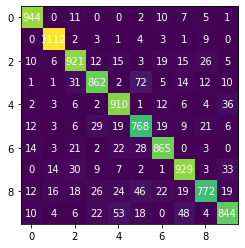

In [9]:
print("System a confusion matrix :")
a_conf_mat = confusion_matrix(syst_a_true, syst_a_pred, 10)
print_confusion_matrix(a_conf_mat, 10)

### d) Precision and recall

In [10]:
def precision(conf_mat, class_id):
    col = np.array([x[class_id] for x in conf_mat])
    return col[class_id] / col.sum()

In [11]:
def recall(conf_mat, class_id):
    line = conf_mat[class_id]
    return line[class_id] / line.sum()

In [12]:
def f1_score(precision, recall):
    return 2*((precision*recall)/(precision+recall))

In [13]:
from prettytable import PrettyTable

def summary(conf_mat, class_count):
    t = PrettyTable(['Class', 'Precision', 'Recall', 'F1 score'])
    
    for i in range(class_count):
        prec = precision(conf_mat, i)
        reca = recall(conf_mat, i)
        scor = f1_score(prec, reca)
        t.add_row([i, round(prec,3), round(reca,3), round(scor,3)])
    
    print(t)

In [14]:
print("System a metrics :")
summary(a_conf_mat, 10)

System a metrics :
+-------+-----------+--------+----------+
| Class | Precision | Recall | F1 score |
+-------+-----------+--------+----------+
|   0   |   0.939   | 0.963  |  0.951   |
|   1   |   0.957   |  0.98  |  0.968   |
|   2   |   0.875   | 0.892  |  0.884   |
|   3   |   0.891   | 0.853  |  0.872   |
|   4   |   0.864   | 0.927  |  0.894   |
|   5   |   0.814   | 0.861  |  0.837   |
|   6   |   0.905   | 0.903  |  0.904   |
|   7   |   0.886   | 0.904  |  0.895   |
|   8   |   0.899   | 0.793  |  0.842   |
|   9   |   0.885   | 0.836  |   0.86   |
+-------+-----------+--------+----------+


* La meilleure classe en terme de recall et de f1-score est la classe 1
* La pire classe en terme de recall est la classe 9 et en terme de f1-score la 5

### e) System b

In [16]:
print("System a error rate :", error_rate(syst_a_true, syst_a_pred))
print("System b error rate :", error_rate(syst_b_true, syst_b_pred))

print("\nSystem b metrics")
b_conf_mat = confusion_matrix(syst_b_true, syst_b_pred, 10)
summary(b_conf_mat, 10)

System a error rate : 0.1073
System b error rate : 0.0387

System b metrics
+-------+-----------+--------+----------+
| Class | Precision | Recall | F1 score |
+-------+-----------+--------+----------+
|   0   |    0.97   | 0.983  |  0.976   |
|   1   |   0.984   | 0.989  |  0.987   |
|   2   |    0.95   | 0.965  |  0.958   |
|   3   |   0.925   | 0.975  |  0.949   |
|   4   |   0.968   | 0.955  |  0.962   |
|   5   |   0.972   |  0.93  |  0.951   |
|   6   |   0.956   | 0.971  |  0.963   |
|   7   |   0.967   | 0.954  |  0.961   |
|   8   |   0.963   | 0.936  |   0.95   |
|   9   |   0.959   | 0.946  |  0.953   |
+-------+-----------+--------+----------+


En regardant les deux systèmes, on remarque que le b est meilleur autant en taux d'erreur que en f1 score